# Import libraries

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## Open image and turn it to grayscale

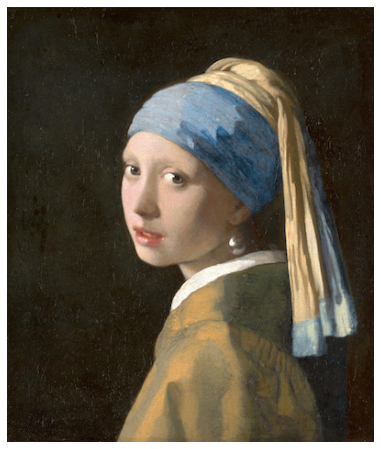

In [2]:
image = Image.open('1665_girl_with_a_pearl_earring_sm.jpg')
img_array = np.array(image)
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(img_array)
plt.show()

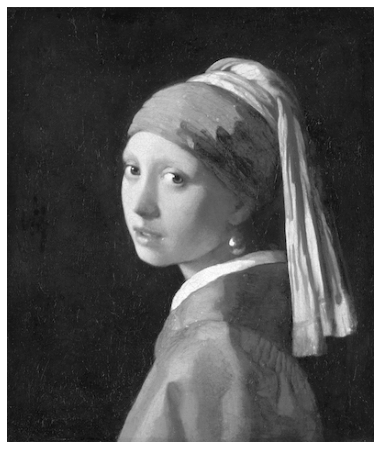

In [3]:
gray = np.zeros((img_array.shape[0],img_array.shape[1]))
for i in range(img_array.shape[0]):
    for j in range(img_array.shape[1]):
        gray[i, j] = img_array[i, j][0]*0.6 + img_array[i, j][1]*0.3 + img_array[i, j][2]*0.1

plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.show()

img_array = gray

## Dithering

In [4]:
def get_nearest_in_pallete(value, n_bit):
    return np.round(n_bit * value / 255) * (255 / n_bit)

In [5]:
for i in range(img_array.shape[0]):
    for j in range(img_array.shape[1]): 
        old_value = img_array[i, j]
        new_value = get_nearest_in_pallete(old_value, 1)
        error = old_value - new_value
        img_array[i, j] = new_value
        if i != img_array.shape[0] - 1:
            img_array[i + 1, j] += 5 / 16 * error
            if j != 0:
                img_array[i + 1, j - 1] += 3 / 16 * error
            if j != img_array.shape[1] - 1:
                img_array[i + 1, j + 1] += 1 / 16 * error
        
        if j != img_array.shape[1] - 1: 
            img_array[i, j + 1] += 7 / 16 * error     

## Save and show results

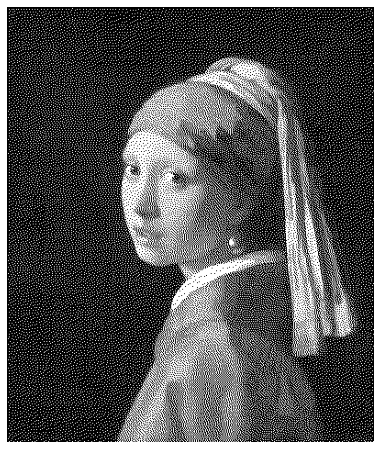

In [6]:
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(img_array, cmap='gray', vmin=0, vmax=255)
plt.savefig('FS_dithered.png')
plt.show()

In [7]:
np.histogram(img_array)

(array([136142,      0,      0,      0,      0,      0,      0,      0,
             0,  53458], dtype=int64),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]))